In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import string

In [24]:
def create_stacked_plot(fig_n, datas, y_stack_frac, color_list=None, x_axis_label=None, figure_index=None, title=None):
    """
    Create a stacked plot with multiple subplots, each with its own y-axis side and color.
    
    Parameters:
    fig_n : matplotlib.figure.Figure
        The figure object to use for the plot. 
        can be a subfigure, so that can be added to a larger figure.
    datas : List[xarray.DataArray]
        A list of xarray.DataArrays containing the data to plot.
    y_stack_frac : float, range [0, 0.5]
        The compression factor for the y-axis. 
        for example, if y_stack_frac=0.3, the 30% y-axis will be stacked.
    color_list : List[str], optional
        A list of hex color codes to use for the subplots. If None, a default set of colors will be used.
    x_axis_label : Dict[int, str], optional
        A dictionary mapping subplot indices to x-axis label strings. If empty, no x-axis labels will be added.
    figure_index : List[str], optional
        A list of strings to be used as figure index. If empty, no figure index will be added.
    title : str, optional
        The title of the plot.
        
    Returns:
    fig_n : matplotlib.figure.Figure
        The created figure object.
    axs : List[matplotlib.axes.Axes]
        A list of axes objects corresponding to the subplots.
    """
    # Determine the number of subplots needed
    num_subplots = len(datas)

    # Generate a list of beautiful colors
    if color_list is None:
        colors = [
            '#1f77b7', '#ff7f0e', '#2ca02c', '#d62728',
            '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
            '#bcbd2d', '#17becf'
        ]
    else:
        colors = color_list

    if x_axis_label is None:
        x_axis_label = 'X axis'
    else: 
        print(f'x axis {x_axis_label}')

    # defalt index should be a list of strings,
    # from (a) to (z), with the length of datas
    # use string.ascii_lowercase
    if figure_index is None:
        figure_index = [f'({index})' for index in string.ascii_lowercase[:len(datas)]]
    else:
        print(f'figure index {figure_index}')
    
    
    # Create a figure with the appropriate number of subplots
    axs = fig_n.subplots(
        nrows=num_subplots, ncols=1,
        sharex=True, 
        gridspec_kw={
            'left':0.25, 'right':0.75, 'hspace': -y_stack_frac}
        )
    

    # Set the background color of the figure to be transparent
    fig_n.patch.set_facecolor('none')
    
    # Loop through the data and create subplots
    for i, data in enumerate(datas):
        # Determine the color for this subplot
        color = colors[i % len(colors)]
        # Set the background color of the subplot
        # axs[i].patch.set_facecolor(color)
        axs[i].patch.set_facecolor('none')
        
        # Plot the data,
        # could pass other parameters to the plot function
        # according to the need, e.g., lw, ls, marker, etc.
        axs[i].plot(data.coords[data.dims[0]], data.values, c=color, lw=1.5, alpha=0.9)

        # Set spines and y-axis location & color
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        # Set the y-axis properties
        if i % 2 == 0:  # Odd subplot (zero-indexed)
            axs[i].yaxis.tick_left()
            axs[i].yaxis.set_label_position('left')
            axs[i].spines['left'].set_color(color)
            axs[i].spines['right'].set_visible(False)
        else:  # Even subplot
            axs[i].yaxis.tick_right()
            axs[i].yaxis.set_label_position('right')
            axs[i].spines['right'].set_color(color)
            axs[i].spines['left'].set_visible(False)
        # Set the y-axis ticks and labels to the same color
        axs[i].tick_params(axis='y', colors=color)
        # Set the y-axis label using the long_name attribute
        axs[i].set_ylabel(data.attrs.get('long_name', ''), color=color)        
        
        # Hide the x-axis ticks for all but the last subplot
        if i < num_subplots - 1:
            axs[i].tick_params(axis='x', bottom=False, labelbottom=False)
        else:
            axs[i].set_xlabel('X-axis')
        
        # Add subplot figure index
        axs[i].text(0.04, 0.618, figure_index[i], transform=axs[i].transAxes,
                   fontsize=12, va='center', ha='left', weight='bold')#, weight='bold'
        
            
    # Make top and bottom spines visible
    axs[0].spines['top'].set_visible(True)
    axs[-1].spines['bottom'].set_visible(True)
    # axs[-1].spines['bottom'].set_position(('outward', 5))  # Move the spine outward
    axs[-1].set_xlabel(x_axis_label)
    # Add an x-axis on the top of the first subplot
    axs[0].spines['top'].set_visible(True)
    # axs[0].spines['top'].set_position(('outward', 5))  # Move the spine outward
    axs[0].xaxis.tick_top()  # Tick labels on the top
    axs[0].tick_params(axis='x', which='both', 
                       top=True, bottom=False, labeltop=True, labelbottom=False)

    # Add a title
    fig_n.suptitle(title, y=0.99)
    
    return axs


def mark_axes_span(axens, y_stack_frac, span_x, fcolor='gray'):
    '''
    Mark a span in the x-axis of the subplots.
    the y-axis is divided into two parts, the first 70% of the y-axis
    '''
    y_max = 1-y_stack_frac
    for ax in axens:
        ax.axvspan(xmin=span_x[0], xmax=span_x[1], 
                   ymin=0, ymax=y_max, 
                   facecolor=fcolor, alpha=0.2, zorder=0)
    axens[0].axvspan(xmin=span_x[0], xmax=span_x[1],
                     ymin=y_max, ymax=1,
                     facecolor=fcolor, alpha=0.2, zorder=0)

x axis Bottom X-Axis Label
figure index ['a', 'b', 'c', 'd']


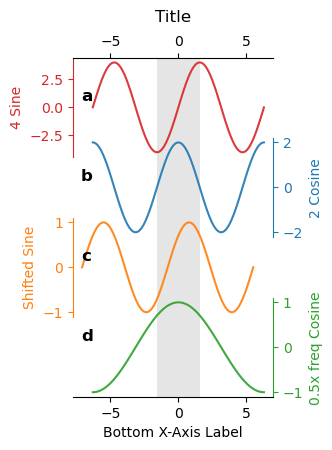

In [25]:
##----------------------------------------
# Define the compression factor for the y-axis.
# range (0, 0.5), could be adjusted according to the need.
# here, just a demo
y_stack_factor = (1-0.618)/2

##----------------------------------------
# Example usage, x-axis can be different for each subplot
x = np.linspace(-np.pi*2, np.pi*2, 100)
data1 = xr.DataArray(np.sin(x)*4, coords=[('x0', x)], dims=['some_x'], attrs={'long_name': '4 Sine'})
data2 = xr.DataArray(np.cos(x)*2, coords=[('x2', x)], dims=['x_some'], attrs={'long_name': '2 Cosine'})
data3 = xr.DataArray(np.sin(x),   coords=[('x3',x-np.pi/4)], dims=['x'], attrs={'long_name': 'Shifted Sine'})
data4 = xr.DataArray(np.cos(x/2),   coords=[('x4',x)], dims=['xn'], attrs={'long_name': '0.5x freq Cosine'})

##----------------------------------------
## list of data, to be plotted
datas = [data1, data2, data3, data4]

##----------------------------------------
## other parameters
cols  = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']
indexs = ['a', 'b', 'c', 'd']
title = 'Title'
x_label = 'Bottom X-Axis Label'


##----------------------------------------
# start to create the plot
fig = plt.figure(figsize=(4, 1.1 * len(datas)))
##----------------------------------------
axes = create_stacked_plot(fig, datas, y_stack_factor, 
                           color_list=cols, x_axis_label=x_label, 
                           figure_index=indexs, title=title)

##----------------------------------------
# set x-axis limit
# axes[0].set_xlim(-np.pi*1.7, np.pi*1.7)

##----------------------------------------
## add span
span_x = [-np.pi/2, np.pi/2]
mark_axes_span(axes, y_stack_factor, span_x, fcolor='gray')
# for ax in axes:
#     ax.axvspan(xmin=span_x[0], xmax=span_x[1], 
#                ymin=0, ymax=1, 
#                facecolor='gray', alpha=0.2, zorder=0)

##----------------------------------------
# show plot
plt.savefig('sample_stacked_plot_adjusted.svg')
# plt.savefig('sample_stacked_plot_adjusted.png', dpi=200)
plt.show()